In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

In [121]:
# utility functions
def create_uniform_dist(l, h, n=500):
    uniform = np.random.uniform(l, h, (n, 2))
    return uniform

In [122]:
# Build data using uniform distributions
N = 5000
# x_a = create_uniform_dist([-1, 0], [0, 1], n=N)
x_a = create_uniform_dist(.5, 2.5, n=N)
x_a = np.array([ np.append(f, np.random.uniform(low=.5, high=1.5, size=(1,))[0]) for f in x_a])
x_a_0, x_a_1, x_a_2 = x_a.T
y_a = np.chararray(N)
y_a[:] = 'A'

# x_b = create_uniform_dist([0, 2], [2, 2], n=N)
x_b = create_uniform_dist(.5, 2.5, n=N)
x_b = np.array([ np.append(f, np.random.uniform(low=1.6, high=2.5, size=(1,))[0]) for f in x_b])
x_b_0, x_b_1, x_b_2 = x_b.T
y_b = np.chararray(N)
y_b[:] = 'B'
x = [*x_a, *x_b]
y = [*y_a, *y_b]

In [162]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

ax = plt.axes(projection='3d')

ax.scatter3D(x_a_0, x_a_1, x_a_2, color='Red')
ax.scatter3D(x_b_0, x_b_1, x_b_2, color='Blue')
ax.set(title='Linearly Separable Classes A and B', xlabel='Feature 1', ylabel='Feature 2', zlabel='Feature 3')
ax.legend(['Class A', 'Class B', 'Class C', 'Class D'])

# plt.show()
plt.savefig('3d_data.png', bbox_inches='tight')
plt.clf()

<Figure size 720x720 with 0 Axes>

In [124]:
# lrn_rates = np.arange(.0001, 1.0001, .0001)
# lrn_rates = np.arange(1, 101)
# lrn_rates = [.0001, .05, .5, 1]
lrn_rates = np.arange(0, 1.001, .001)
lrn_rates[0] = .0001

In [125]:
epochs = []
accs = []
x_train, x_test, y_train, y_test = train_test_split(x, y)

for i in lrn_rates:
    p = Perceptron(eta0=i)
    p.fit([*x_train, *x_test], [*y_train, *y_test], coef_init=[-.5, .5, 3.6], intercept_init=[-10])

    epochs.append(p.n_iter_)
    temp_acc = accuracy_score(p.predict(x), y)
    accs.append(temp_acc)
    print(f'Learning Rate={i:.4f} :: Epoch {p.n_iter_:2} :: Accuracy {temp_acc:.4f}')
    # print(f'Weights: {p.coef_} {p.intercept_}')

Learning Rate=0.0001 :: Epoch 11 :: Accuracy 0.9609
Learning Rate=0.0010 :: Epoch 10 :: Accuracy 0.9951
Learning Rate=0.0020 :: Epoch  9 :: Accuracy 0.9987
Learning Rate=0.0030 :: Epoch  8 :: Accuracy 0.9989
Learning Rate=0.0040 :: Epoch  8 :: Accuracy 0.9997
Learning Rate=0.0050 :: Epoch  7 :: Accuracy 0.9999
Learning Rate=0.0060 :: Epoch  7 :: Accuracy 0.9997
Learning Rate=0.0070 :: Epoch  7 :: Accuracy 0.9998
Learning Rate=0.0080 :: Epoch  7 :: Accuracy 0.9999
Learning Rate=0.0090 :: Epoch  7 :: Accuracy 0.9999
Learning Rate=0.0100 :: Epoch  7 :: Accuracy 0.9999
Learning Rate=0.0110 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0120 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0130 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0140 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0150 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0160 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0170 :: Epoch  7 :: Accuracy 1.0000
Learning Rate=0.0180 :: Epoch  7 :: Accuracy 1.0000
Learning Rat

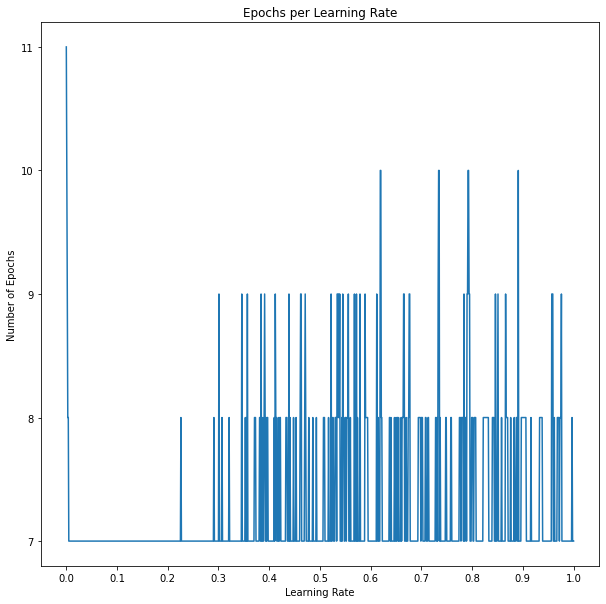

<Figure size 432x288 with 0 Axes>

In [146]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = fig.subplots(1)
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
ax.plot(lrn_rates, epochs)
ax.set(title='Epochs per Learning Rate', xlabel='Learning Rate', ylabel='Number of Epochs')
ax.yaxis.set(ticks=np.arange(7, 12, 1))
ax.xaxis.set(ticks=np.arange(0, 1.1, .1))

plt.show()
plt.clf()

In [161]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

ax = fig.subplots(1)
ax.plot(lrn_rates, epochs)
ax.set(title='Epochs per Learning Rate', xlabel='Learning Rate', ylabel='Number of Epochs')
ax.yaxis.set(ticks=np.arange(7, 12, 1))
ax.xaxis.set(ticks=np.arange(0, 1.1, .1))

# plt.show()
plt.savefig('epoch_per_lr.png', bbox_inches='tight')
plt.clf()

<Figure size 720x720 with 0 Axes>